# Laboratorio 1 - Preparación y Visualización de Datos

## Grupo 1 - Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Netflix

### 2.1- Confirma o desmiente la hipótesis de que las series han desbancado a las películas en la oferta de Netflix.

In [1]:
%config IPCompleter.greedy=True

#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Deberiamos analizar el numero de películas vs el numero de serie....
#Importamos el CSV de Netflix
df_netflix = pd.read_csv('netflix.csv')
#Visualizamos los datos
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [2]:
#Preprocesamiento de datos
#Miramos si hay peliculas o series faltantes (Sin Titulo)
titulos = df_netflix['title']
print('Hay',titulos.isnull().sum(),'datos sin título')

#Miramos si hay peliculas repetidas
titulosDuplicados = df_netflix.duplicated().sum()
print('Hay',titulosDuplicados,'titulos duplicados')

Hay 0 datos sin título
Hay 0 titulos duplicados


In [3]:
#Tamaño del dataset
print('El Dataset tiene',df_netflix.shape[0],'instancias y',df_netflix.shape[1],'atributos');

#Sacamos los diferentes tipos
tipos = df_netflix["type"]
print('Los valores para clasiicar en el dataset disponibles son:',set(tipos))

#Numero de peliculas
peliculas = tipos[tipos=="Movie"].count()
#Numeros de series
series = tipos[tipos=="TV Show"].count()

#Resultados
print('En el Dataset hay',peliculas,'peliculas y',series,'series')
print('Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas')

#Suma de peliculas y series. Deberá ser igual al número total de instancias del dataset
pelisYSeries = peliculas+series

#Comprobamos que solo haya peliculas y series
if pelisYSeries == tipos.shape[0]:
    print('Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar')
else:
    print('Hay otro tipo de etiqueta diferente a TV Show o Movie')


El Dataset tiene 6234 instancias y 12 atributos
Los valores para clasiicar en el dataset disponibles son: {'TV Show', 'Movie'}
En el Dataset hay 4265 peliculas y 1969 series
Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas
Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar


### 2.1.1- (1 punto) Encuentra el número de películas vs número de series disponibles totales ¿Qué porcentaje del contenido representa cada categoría? Muéstralo en un gráfico justificando la elección del tipo de gráfico.

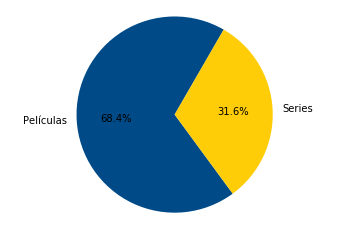

In [4]:
#Hemos encontrado que hay 4265 peliculas y 1969 series
#PieChart
labels = 'Películas','Series'
sizes = [peliculas,series]
colors = ['#004B87', '#FFCD07']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=60, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('PieChartPelisvsSeries.png')

plt.show()

En este gráfico de tarta, podemos observar las proporciones que conforman el conjunto de Series y Películas de la plataforma Netflix. Hemos escogido este tipo de gráfico debido a que únicamente pretendemos comunicar la magnitud de cada uno de los atributos y con esta gráfica se transmite con perfecta claridad la relación entre ambos.

In [5]:
## OJOS RECURRENTES PARA CORREGIR

### 2.1.2- (1 punto) Estudia el número de películas vs número de series disponibles por año de publicación en Netflix. Para eso, crea un gráfico que muestre la evolución temporal (por años) de la cantidad de series y de películas disponibles en la plataforma. Justifica el gráfico elegido y explica la tendencia que observas en los datos. ¿Qué conclusión puedes extraer?

In [6]:
#Dataframe con - Tipo / Titulo / Año de Publicacion
df_Netflix2 = df_netflix[['type','title','release_year','date_added']]

#Realmente no necesitamos el título, si bien, nos ayuda a entender los datos mejor
#Borramos los datos donde no haya valores, ya que si no sabemos cuando se publicó esa película no podemos analizarla
df_Netflix2 = df_Netflix2.dropna()

fechaRelease = df_netflix[['date_added']].dropna()

years = fechaRelease['date_added'].apply(str).str[-4:]

df_Netflix2['date_added'] = years

years = np.sort(years.unique())

pelisTotales = 0
seriesTotales = 0
numAnios = 0;

arrayPelis = []
arraySeries = []

for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['date_added'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['date_added'] == year)]
    print('En el año\033[1m',year,'\033[0mNetflix lanzó\033[1m',pelisPorAnio.shape[0],'películas\033[0m y\033[1m',seriesPorAnio.shape[0],'series\033[0m')
    pelisTotales += pelisPorAnio.shape[0]
    seriesTotales += seriesPorAnio.shape[0]
    arrayPelis.append(pelisPorAnio.shape[0])
    arraySeries.append(seriesPorAnio.shape[0])
    numAnios += 1

En el año 2008 Netflix lanzó 1 películas y 1 series
En el año 2009 Netflix lanzó 2 películas y 0 series
En el año 2010 Netflix lanzó 1 películas y 0 series
En el año 2011 Netflix lanzó 13 películas y 0 series
En el año 2012 Netflix lanzó 4 películas y 3 series
En el año 2013 Netflix lanzó 6 películas y 6 series
En el año 2014 Netflix lanzó 19 películas y 6 series
En el año 2015 Netflix lanzó 58 películas y 32 series
En el año 2016 Netflix lanzó 264 películas y 192 series
En el año 2017 Netflix lanzó 913 películas y 387 series
En el año 2018 Netflix lanzó 1290 películas y 492 series
En el año 2019 Netflix lanzó 1546 películas y 803 series
En el año 2020 Netflix lanzó 147 películas y 37 series


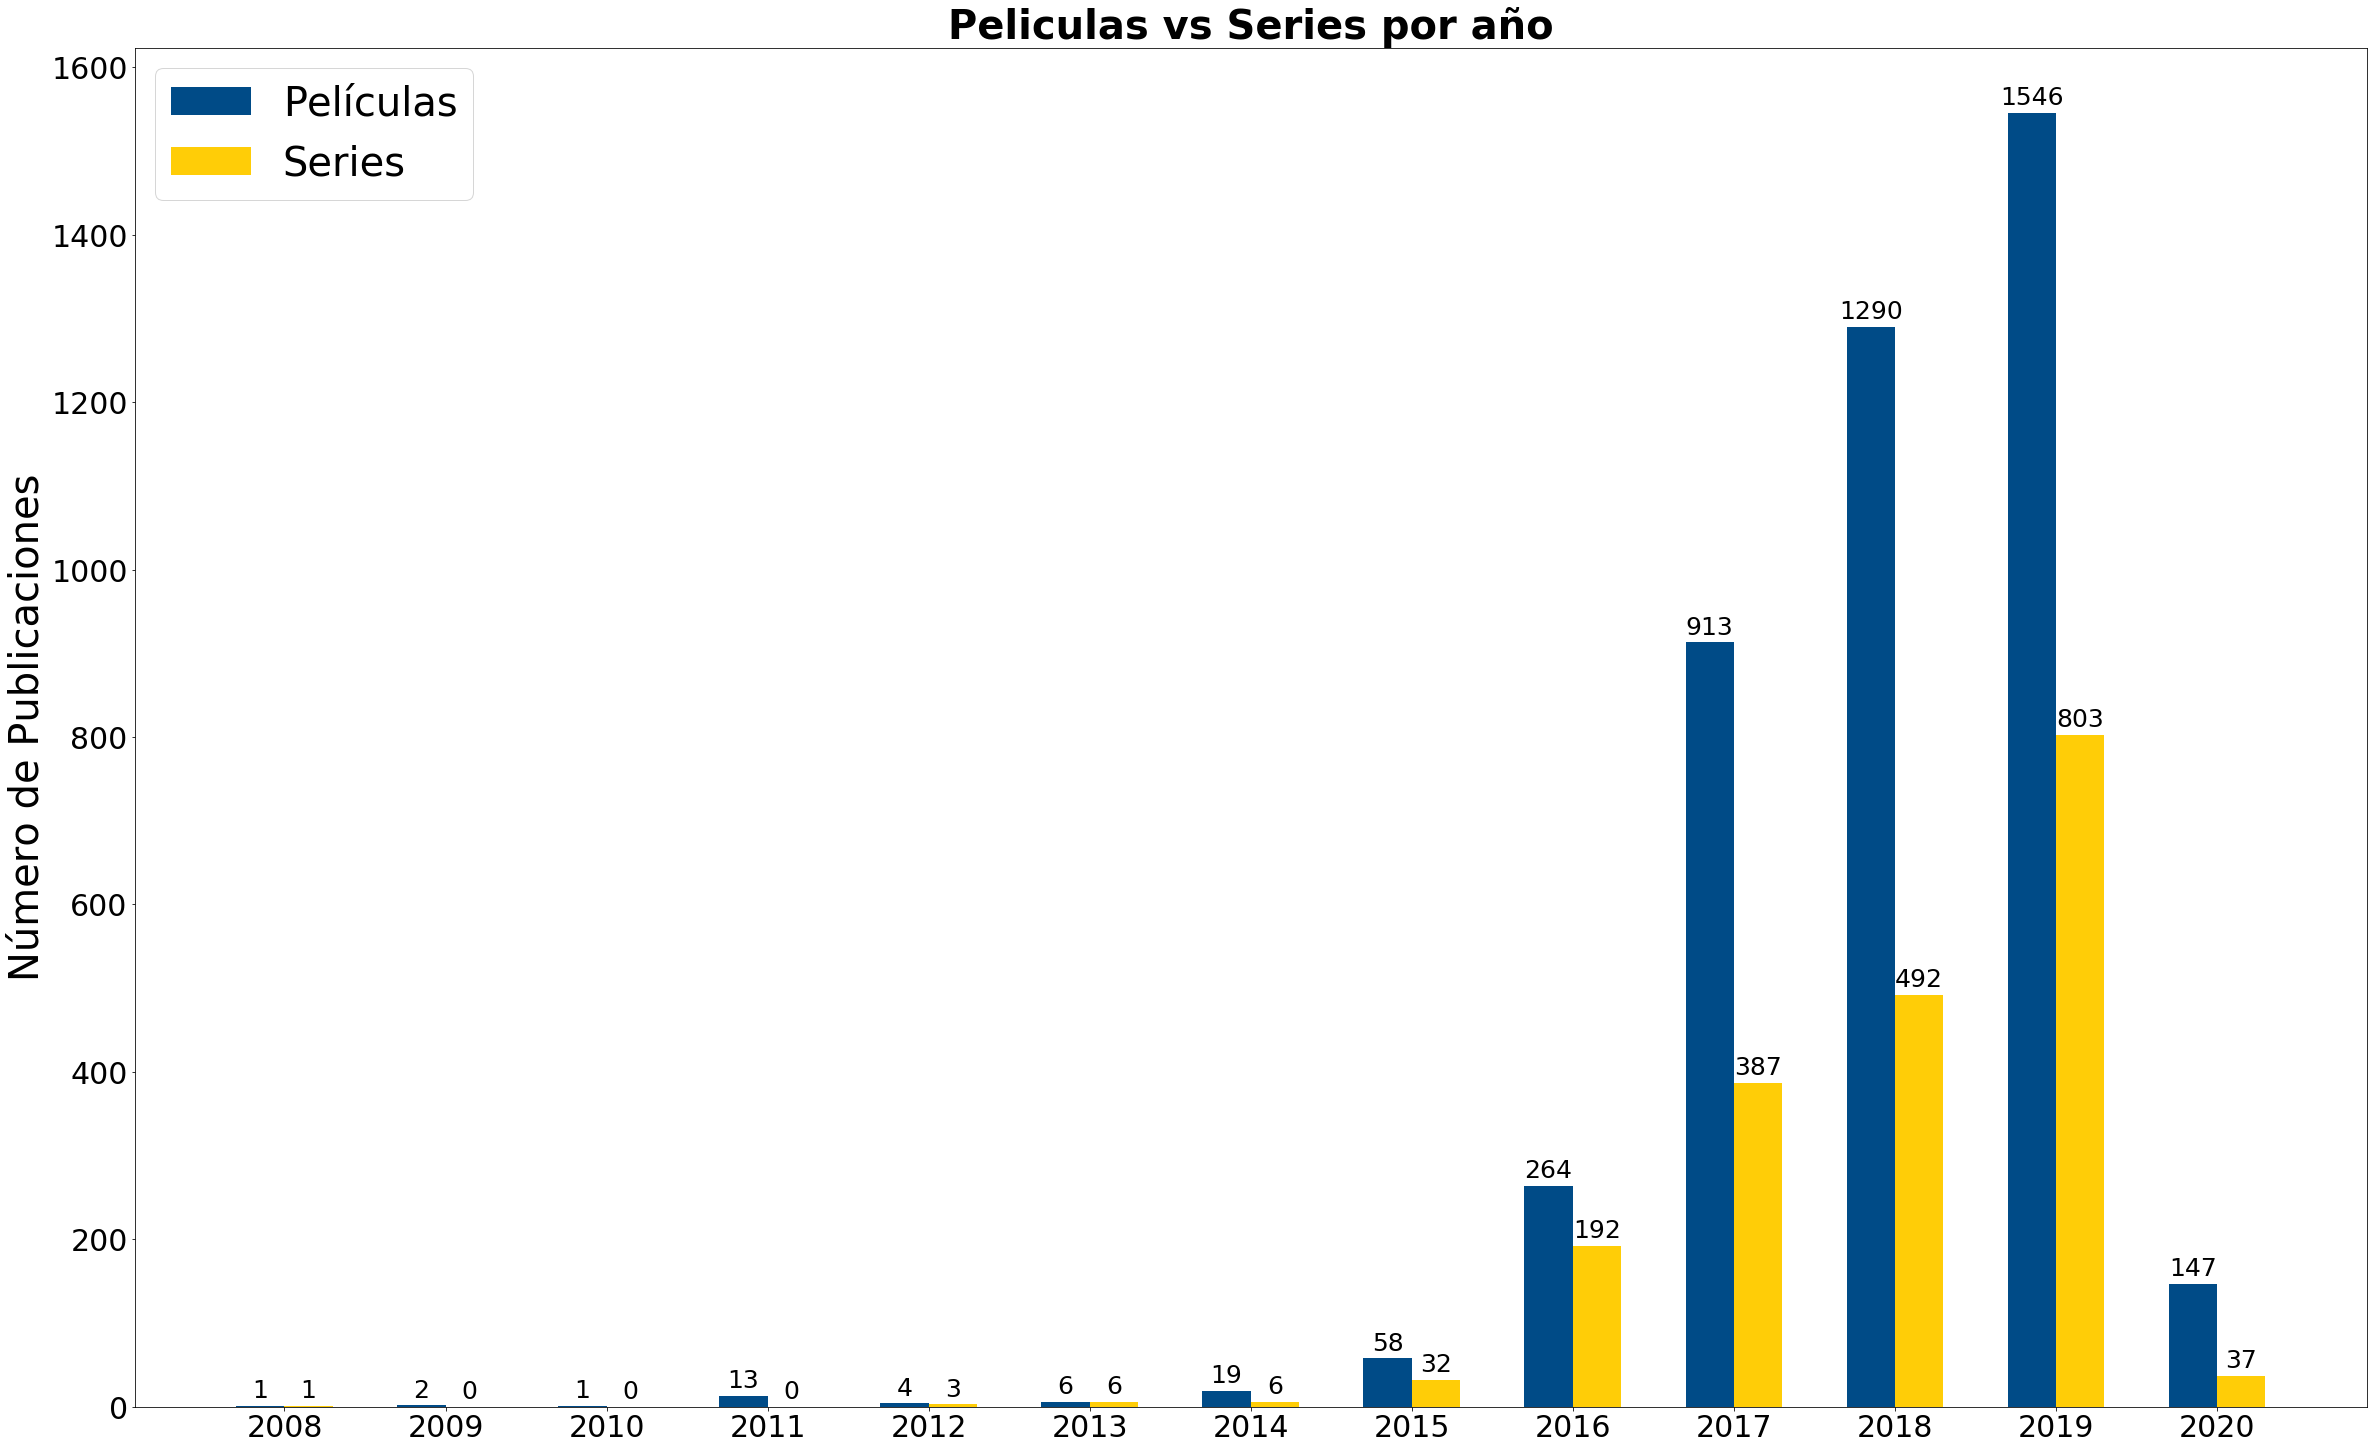

In [7]:
labels = years
pelis = arrayPelis
series = arraySeries

x = np.arange(len(labels))  # the label locations
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(40,25))
rects1 = ax.bar(x - width/2, pelis, width, color = '#004B87', label='Películas')
rects2 = ax.bar(x + width/2, series, width, color = '#FFCD07', label='Series')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Número de Publicaciones',fontsize=40)
ax.set_title('Peliculas vs Series por año',fontsize=40, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=25)

autolabel(rects1)
autolabel(rects2)

plt.legend(fontsize=40)
plt.yticks(fontsize=30)

plt.savefig('PelisvsSeriesYearly.png')

plt.show()

Si nos fijamos en la gráfica de barras representada anteriormente, podemos ver una mayor evolución en la publicación de contenido que ha tenido la plataforma en los últimos 5 años. Mientras que los primeros años, se da una tendencia muy baja en la publicación de contenido en la plataforma, tanto de películas como de series, pero lo que más nos llama la atención es que en los inicios no se publicaron apenas series y es el 2015 cuando podemos ver como comienza a haber un crecimiento de estas. 

El motivo principal por el que se ha escogido este tipo de gráfico, es que nos permite tanto comparar las series vs películas publicadas anualmente, como visualizar el crecimiento de las publicaciones a lo largo de los años.

In [8]:
## OJOS RECURRENTES PARA CORREGIR

### 2.2- (0.5 puntos) Estudia la viabilidad de la plataforma Netflix ¿se sigue añadiendo contenido o hay una tendencia a la baja? Es decir, ¿la plataforma sigue creciendo o se pueden apreciar signos de desaceleración?

#### Para esto muestra la cantidad de contenido añadido a la plataforma por años. Justifica el gráfico elegido y explica la tendencia observada.

Publicaciones de Netflix en total: [2, 2, 1, 13, 7, 12, 25, 90, 456, 1300, 1782, 2349, 184]


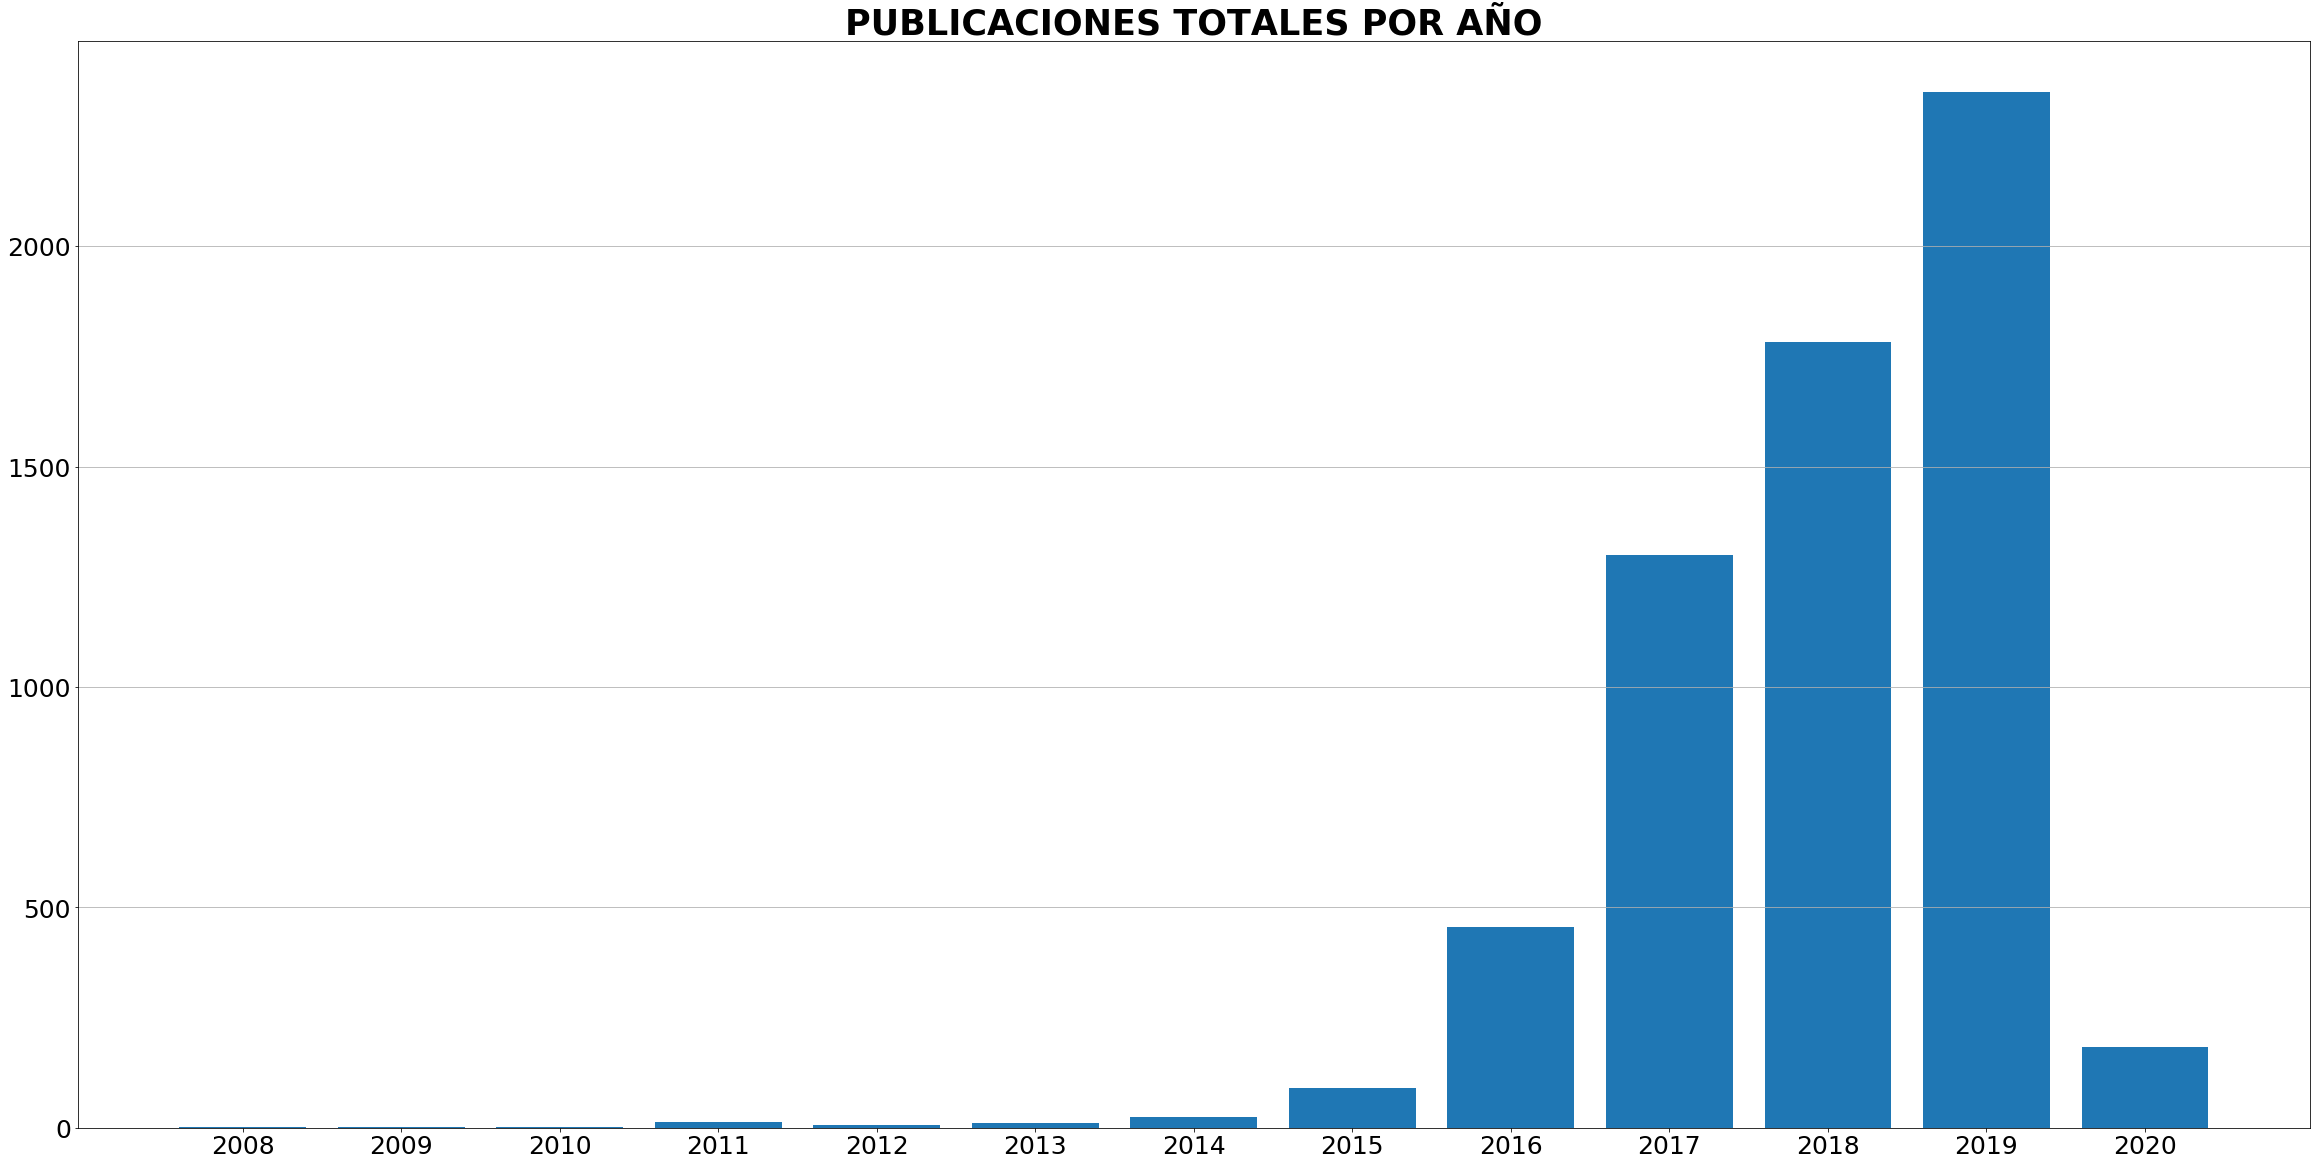

In [9]:
#Debemos mirar si sumando peliculas y series por años, se han ido añadiendo más o menos contenidos
arrayTotal = []

#Para cada uno de los años
for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['date_added'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['date_added'] == year)]
    arrayTotal.append(pelisPorAnio.shape[0] + seriesPorAnio.shape[0])
    numAnios += 1
    
print('Publicaciones de Netflix en total:',arrayTotal)

height = arrayTotal
bars = years
posiciones = np.arange(len(bars))

plt.figure(figsize=(40, 20))

# Create bars
plt.bar(posiciones, height)
 
# Create names on the x-axis
plt.xticks(posiciones, bars, fontsize=25)
plt.yticks(fontsize=25)

plt.title('PUBLICACIONES TOTALES POR AÑO', fontsize=35, fontweight='bold')

plt.savefig('totalReleasesYearly.png')

plt.grid(b=True, which='major', axis='y')

# Show graphic
plt.show()

De acuerdo a la trayectoria visible a través del gráfico, hay una clara tendencia positiva respecto a las publicaciones hechas desde el comienzo de la plataforma. Sin embargo, nos topamos con un caso anómalo en el 2020, la hipotesis que barajamos, es que el dataset ha sido completado a mediados o principios de este año, coincidiendo además con la crisis mundial que se está sufriendo debido al COVID-19 que ha podido retrasar muchos de los estrenos en la plataforma debido a retrasos en las producciones. Para sacar alguna conclusión más definitiva, podemos afirmar que el contenido de Netflix ha ido creciendo si bien en este último 2020 no se da ese hecho pero como hemos dicho puede ser por la pandemia de COVID-19 que asola a todo el planeta, porque el dataset haya sido realizado hasta el primer trimestre de 2020 o bien por ambas.

In [10]:
## OJOS RECURRENTES PARA CORREGIR Y AÑADIR

### 2.3-Estudio del momento de aparición del contenido en Netflix. 

### 2.3.1-(1 punto) ¿Cuál es el retraso medio en publicar una película en Netflix? ¿Y para una serie? ¿hay variación en este retraso a lo largo de los años? Visualiza los datos utilizando los gráficos más adecuados justificando su elección.¿Crees que este reflejo de la actividad de la plataforma es un indicativo de su viabilidad y proyección? Justifica la respuesta preferiblemente apoyándote en los datos. 

In [11]:
df = df_Netflix2[(df_Netflix2['type'] == 'Movie')]
#Eliminamos las duplicadas
df = df.drop_duplicates()
df = df.dropna()
peliculas = df
peliculas['date_added'] = df['date_added'].apply(int)

print('Tenemos',df.shape[0],'películas')

aniosDifPeliculas = []

for pelicula in peliculas.values:
    dif = pelicula[3]-pelicula[2]
    aniosDifPeliculas.append(dif)

media = sum(aniosDifPeliculas)/len(aniosDifPeliculas)

print('La media de retraso de publicacion de películas en Netflix es de:',round(media,2),'años') 

Tenemos 4263 películas
La media de retraso de publicacion de películas en Netflix es de: 5.64 años


In [12]:
df = df_Netflix2[(df_Netflix2['type'] == 'TV Show')]
#Eliminamos las duplicadas
df = df.drop_duplicates()
df = df.dropna()
series = df
series['date_added'] = df['date_added'].apply(int)

print('Tenemos',df.shape[0],'series')

aniosDifSeries = []

for serie in series.values:
    dif = serie[3]-serie[2]
    aniosDifSeries.append(dif)

media = sum(aniosDifSeries)/len(aniosDifSeries)

print('La media de retraso de publicacion de series en Netflix es de:',round(media,2),'años') 

Tenemos 1958 series
La media de retraso de publicacion de series en Netflix es de: 2.41 años


In [16]:
#Variacion a lo largo de los años en la publicacion de series y peliculas
#Debemos comparar el retraso para cada año de publicación, es decir, para cada año diferente,
#comprobar el retraso de las publicaciones de ese año

#Pasamos los años que tenemos a integer, tenemos una lista de strings
anios = list(map(int, years))

#Definimos los arrays para almacenar el retraso medio por años
retrasosSeries = []
retrasosPelis = []

print('--------------------------------------------------------------------------')
#Para cada año, buscaremos las series y las peliculas y compararemos el año vs el año de lanzamiento de la peli o serie
for anio in anios:
    #Cogemos las series para el año actual
    seriesAnio = series[(series['date_added'] == anio)]
    #Cogemos las películas para el año actual
    pelisAnio = peliculas[(peliculas['date_added'] == anio)]
    #Si hay series para ese año
    if seriesAnio.shape[0] > 0:
        #Guardamos el año en el que se lanzaron las series
        anioLanzamiento = seriesAnio['release_year'].values
        #Restamos el año en el que estamos - el año que se lanzo la serie
        dif = anio - anioLanzamiento
        #La media sera la suma de diferencias de año entre las series de ese año
        media = dif.sum() / seriesAnio.shape[0];
        print('El \033[1mretraso anual\033[0m para las \033[1mseries en\033[0m el año\033[1m',
              anio,'\033[0mes de\033[1m',round(media,2),'años\033[0m')
        retrasosSeries.append(round(media,2))
    else:
        print('\033[1mEn',anio,'Netflix no publicó ninguna serie\033[0m en su plataforma')
        retrasosSeries.append(0)
    if pelisAnio.shape[0] > 0:
        #Guardamos el año en el que se lanzaron las series
        anioLanzamiento = pelisAnio['release_year'].values
        #Restamos el año en el que estamos - el año que se lanzo la película
        dif = anio - anioLanzamiento
        #La media sera la suma de diferencias de año entre las series de ese año
        media = dif.sum() / pelisAnio.shape[0];
        print('El \033[1mretraso anual\033[0m para las \033[1mpelículas en\033[0m el año\033[1m',
              anio,'\033[0mes de\033[1m',round(media,2),'años\033[0m')
        retrasosPelis.append(round(media,2))
    else:
        print('\033[1mEn',anio,'Netflix no publicó ninguna película\033[0m en su plataforma')
        retrasosPelis.append(0)
    print('--------------------------------------------------------------------------')



--------------------------------------------------------------------------
El retraso anual para las series en el año 2008 es de 1.0 años
El retraso anual para las películas en el año 2008 es de 2.0 años
--------------------------------------------------------------------------
En 2009 Netflix no publicó ninguna serie en su plataforma
El retraso anual para las películas en el año 2009 es de 1.0 años
--------------------------------------------------------------------------
En 2010 Netflix no publicó ninguna serie en su plataforma
El retraso anual para las películas en el año 2010 es de 23.0 años
--------------------------------------------------------------------------
En 2011 Netflix no publicó ninguna serie en su plataforma
El retraso anual para las películas en el año 2011 es de 19.92 años
--------------------------------------------------------------------------
El retraso anual para las series en el año 2012 es de 2.0 años
El retraso anual para las películas en el año 2012 es de 1

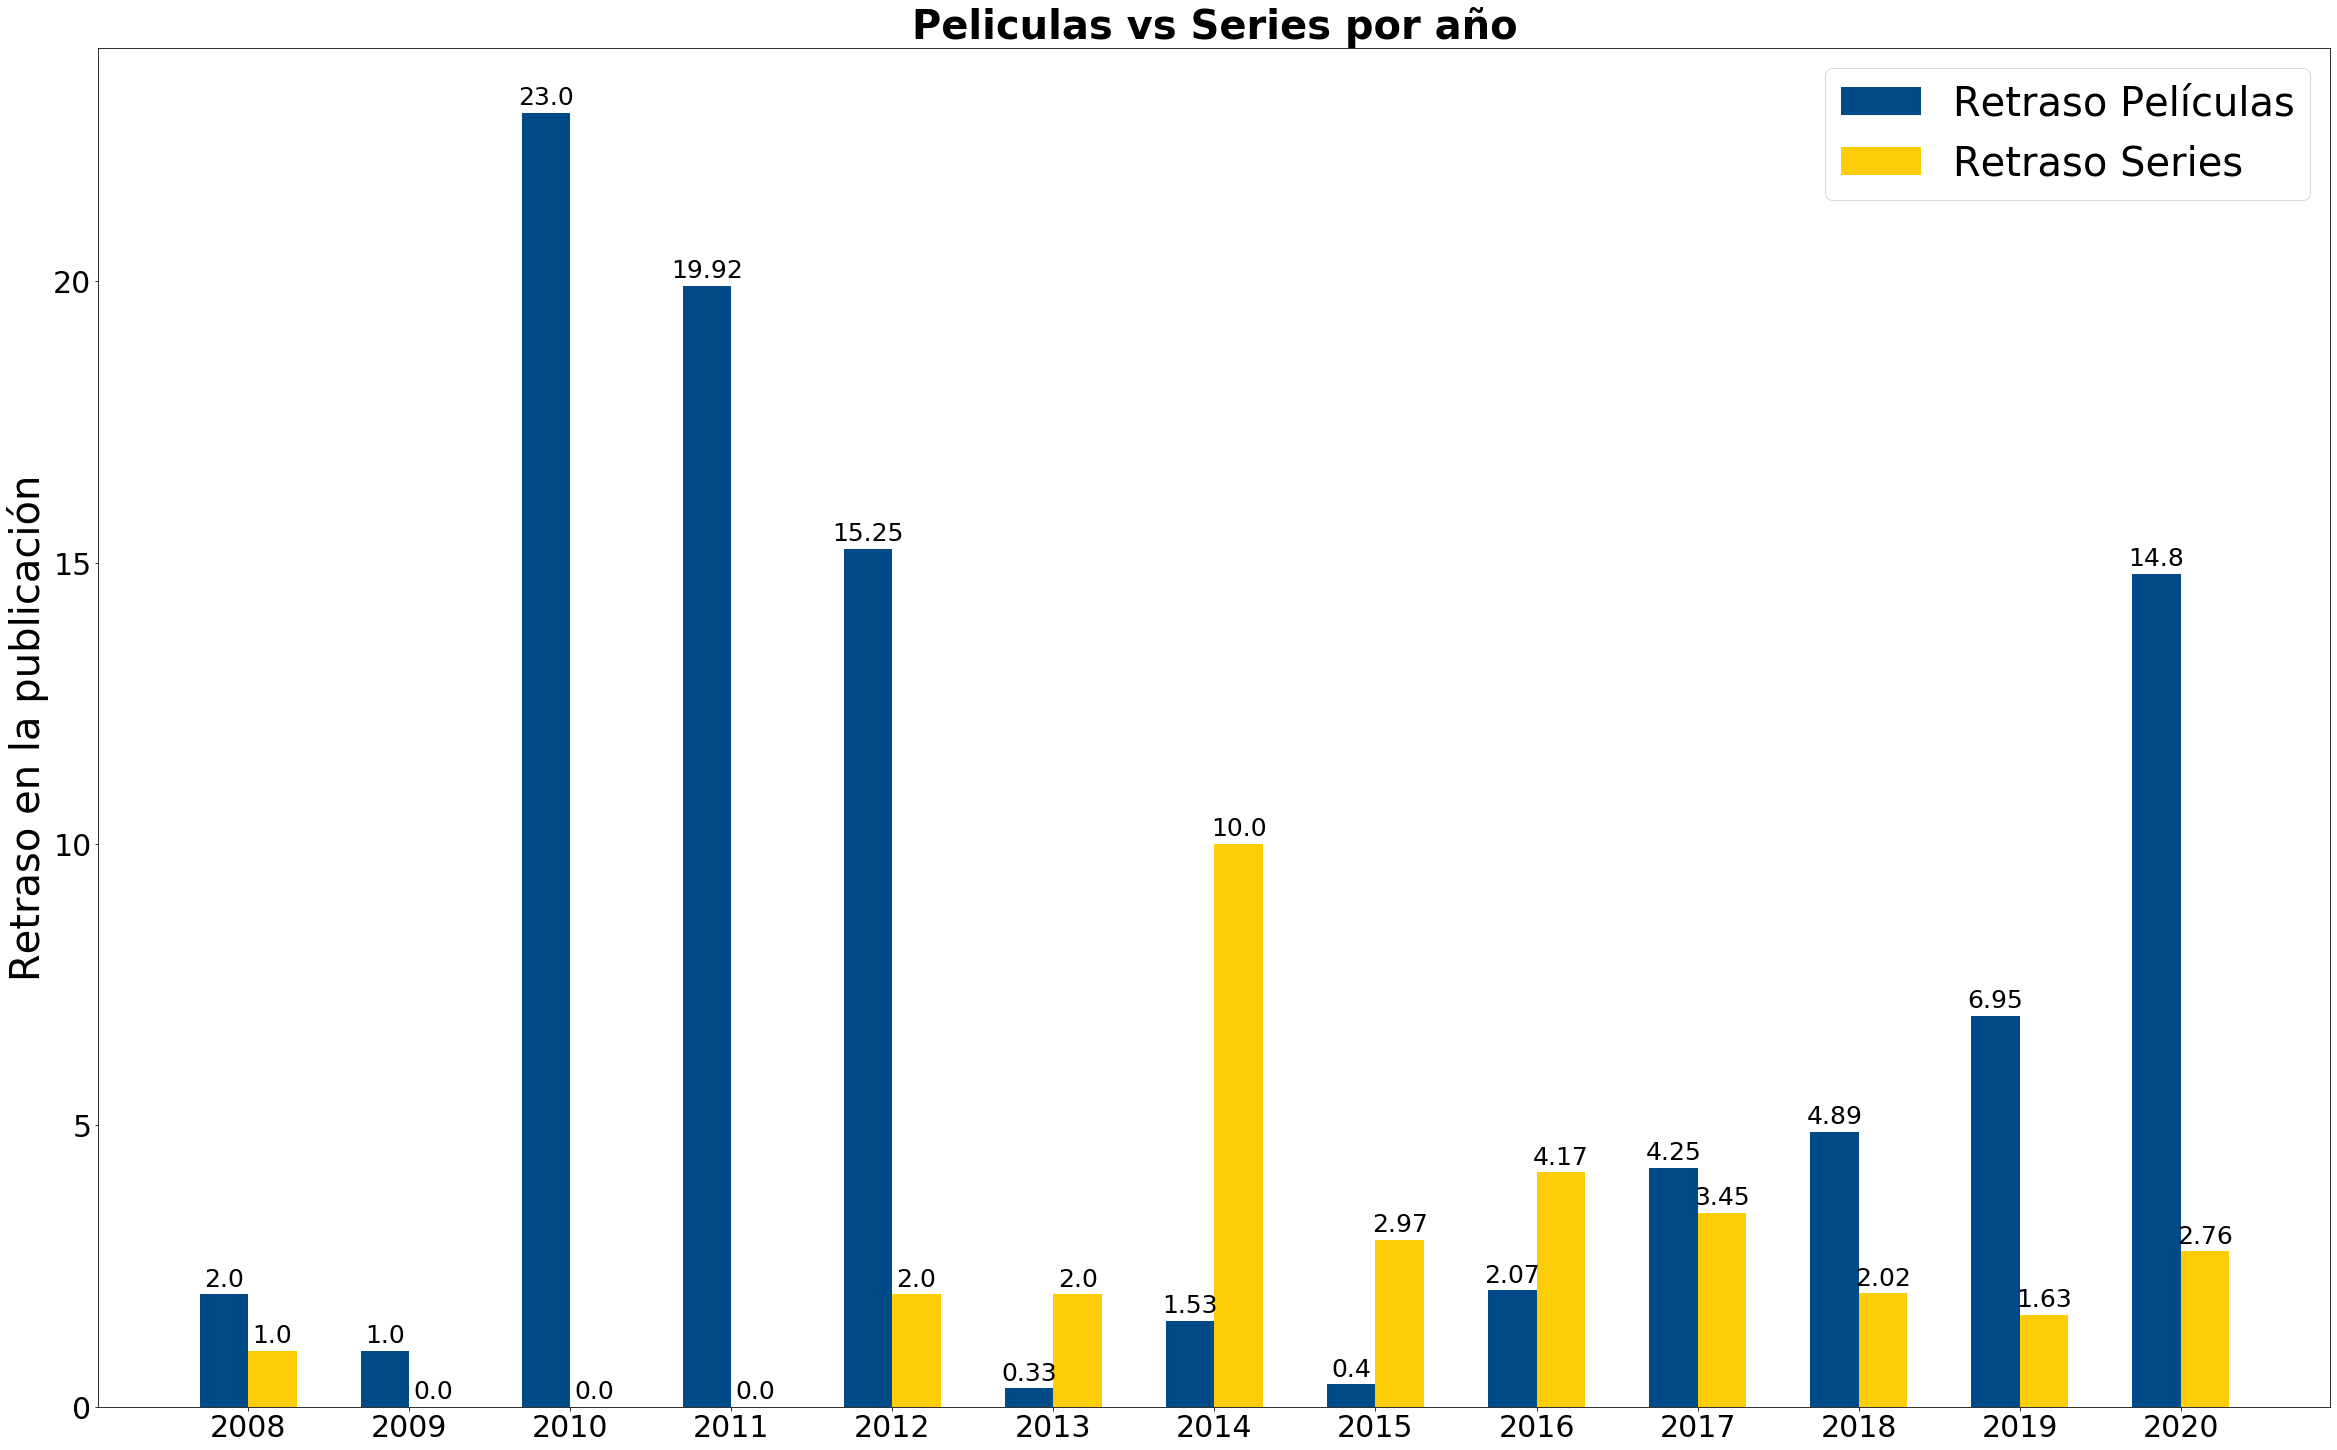

In [17]:
labels = anios
pelisLag = retrasosPelis
seriesLag= retrasosSeries

x = np.arange(len(labels))  # the label locations
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(40,25))
rects1 = ax.bar(x - width/2, pelisLag, width, color = '#004B87', label='Retraso Películas')
rects2 = ax.bar(x + width/2, seriesLag, width, color = '#FFCD07', label='Retraso Series')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Retraso en la publicación',fontsize=40)
ax.set_title('Peliculas vs Series por año',fontsize=40, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=25)

autolabel(rects1)
autolabel(rects2)

plt.legend(fontsize=40)
plt.yticks(fontsize=30)

plt.show()

In [18]:
#Grafico

Esta gráfica representa el tiempo medio entre el estreno de una película y serie, y la obtención de los derechos de visualización por parte de Netflix y su estreno en la plataforma. 
El tiempo medio de estreno en la plataforma es de unos 7 años, aunque no es un dato realmmente útil, ya que en los comienzos de la plataforma hay una gran aportación de peliculas estrenadas en cines muchos años antes, que puede deberse a intentar captar una mayor clientela ofreciendo un catálogo más completo.
Esto no vuelve a suceder hasta el 2020, que hay un pico de aportación que puede resultar de la apertura de la plataforma de Disney+ e intentar mantener un catalogo grande ante las posibles perdidas de clientes, además de querer ofrecer mayor variedad durante los confinamientos producidos a lo largo del año.
En cuanto a las series, el pico más átipico se produce en 2014 Y NO SE PORQUË, en cambio el resto de años se mantiene estable obteniendo una media de alrededor de 3 años, dado que muchas series tienen pocas temporadas puede deberse esta media tan baja a que una vez terminan, los canales venden los derechos a plataformas de visualización Stream para seguir obteniendo beneficios de ellas. Tambien puede suceder que los derechos los tengan otras plataformas y sea cuando les vence el contrato y Netflix puede obtenerlas.
No creemos que tenga ningún tipo de relación el año de estreno en el caso de las películas, el fenomeno de las series en cambio es bastante distinto, a la población le suele gustar comentar las series cuando esta en emisión e ir sacando conclusiones o teorías.
De nuevo, hemos escogido el gráfico de barras para representar los datos ya que nos permite ver la evolución por años y commparar los datos entre series y películas de cada año de formas más cómoda y sencilla.

### 2.3.2-(1 punto) ¿Hay un momento preferido en el año para publicar un contenido? Es decir, ¿hay algún momento del año en el que se ponga más contenido disponible? Para averiguar esto, estudia la media de contenido publicado para cada mes durante el tiempo de vida de Netflix. ¿Hay diferencias si se trata de una película o de una serie? Utiliza de manera justificada los gráficos correspondientes para respaldar tus respuestas. 

In [ ]:
# TO DO